# Lab - Week 2

*Assigned: Thurs. 9/3=10*  
**DUE: Tues. 9/15 @ 5:00pm**

**Name: `Hunter Chambers`**

In this lab, you will explore using the statistical functions, exploratory data visualization, and basic data cleaning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
%matplotlib inline

### Data 

You will again be using the Auto-MPG data set available on the UCI repository. 

https://archive.ics.uci.edu/ml/datasets/Auto+MPG



## Exercise 1 - Import Data 
You will want to create a function to import the data 

* Function should be named "ImportData" and take a url to the data as its input
* Column names should be: 'mpg', 'cylinders', 'displacement','horsepower','weight', 'acceleration', 'model year', 'origin', 'car name'
* Set the DataFrame index (the row labels) to 'car name'

Helpful links: 

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table

In [2]:
# Create the function ImportData here and return the data 

def ImportData(url):
    # return the created DataFrame, df 
    columns = ['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_Year', 'Origin', 'Car_Name']
    df = pd.read_csv(url, sep='\s+', names=columns)
    return df

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'  
data = ImportData(url)
data.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
data.shape

(398, 9)

## Exercise 2: Data Cleaning 

The data cleaning part will have multiple goals: to handle any missing data and to process the string data to remove spaces and replace with an underscore. 

You will create a function, named ColDataClean(data) that:

* Identify any Null/NA/NaN entries in the DataFrame, print out what entries will be removed, and remove them 
* Change the column labels (headers) from all lower case to sentence case and then replace "space" with underscore, "_". Print the column headers before and after.
* Change the DataFrame index (row labels) also be sentence case and replace all spaces with underscore

In [3]:
def ColDataClean(data):
    # Identify, print, and remove any entries with Null / NA / NaN
    print("*** Removing null entries ***")
    data.dropna()
    print()
    
    print("*** String Operations on Column Headers ***")
    print("  Before: ", data.columns)
    # Named the columns correctly when importing the data
    print("  After: ", data.columns) 
    
    print("*** String Operations on index strings *** ")
    car_names = data['Car_Name']
    for name in car_names:
      name = name.title()
      name = name.replace(' ', '_', True)
    data['Car_Name'] = name
    data = data.set_index('Car_Name')
    return data

data = ColDataClean(data)

print(data.head())

*** Removing null entries ***

*** String Operations on Column Headers ***
  Before:  Index(['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin', 'Car_Name'],
      dtype='object')
  After:  Index(['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin', 'Car_Name'],
      dtype='object')
*** String Operations on index strings *** 
             Mpg  Cylinders  Displacement  ... Acceleration  Model_Year  Origin
Car_Name                                   ...                                 
Chevy_S-10  18.0          8         307.0  ...         12.0          70       1
Chevy_S-10  15.0          8         350.0  ...         11.5          70       1
Chevy_S-10  18.0          8         318.0  ...         11.0          70       1
Chevy_S-10  16.0          8         304.0  ...         12.0          70       1
Chevy_S-10  17.0          8         302.0  ...         10.5          70       1

[

## Exercise 3: Data Cleaning and Manipulation 

Look at the types for each column of the DataFrame. 

In [ ]:
data.dtypes

Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model_Year        int64
Origin            int64
dtype: object

Horsepower is consered an object.  But, really this should be a float.  Why is this a float?

In [ ]:
data[data["Horsepower"] == '?']

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
Car_Name,,,,,,,,
Chevy_S-10,25.0,4,98.0,?,2046.0,19.0,71,1
Chevy_S-10,21.0,6,200.0,?,2875.0,17.0,74,1
Chevy_S-10,40.9,4,85.0,?,1835.0,17.3,80,2
Chevy_S-10,23.6,4,140.0,?,2905.0,14.3,80,1
Chevy_S-10,34.5,4,100.0,?,2320.0,15.8,81,2
Chevy_S-10,23.0,4,151.0,?,3035.0,20.5,82,1


There are some missing values in this column that need to be handled.

Create a function HandleHP(data, col), that changes all the "?" values to a replacement value 99 and converts the column to be a float.



In [4]:
def HandleHp(data, col):
    # Guarding 
    if (data[col].dtypes == 'object'):
        print ("  Current data type is : ", data[col].dtypes)
        data['Horsepower'] = data['Horsepower'].replace(['?'], 99)
        data[col] = data[col].astype(float)
        
        print ("  Changed data type is : ", data[col].dtypes)
        
    return data 

HandleHp(data, 'Horsepower')
print(data.dtypes)
data[data['Horsepower'] == 99]

  Current data type is :  object
  Changed data type is :  float64
Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model_Year        int64
Origin            int64
dtype: object


,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
Car_Name,,,,,,,,
Chevy_S-10,25.0,4,98.0,99.0,2046.0,19.0,71,1
Chevy_S-10,21.0,6,200.0,99.0,2875.0,17.0,74,1
Chevy_S-10,40.9,4,85.0,99.0,1835.0,17.3,80,2
Chevy_S-10,23.6,4,140.0,99.0,2905.0,14.3,80,1
Chevy_S-10,34.5,4,100.0,99.0,2320.0,15.8,81,2
Chevy_S-10,23.0,4,151.0,99.0,3035.0,20.5,82,1


## Exercise 4: Data Aggregation and Grouping 

Add two new columns for Kmpl (km per liter) and Kmpg (km per gallon). 

Note, the conversions are 1 mpg = 0.425144 kmpl  and 1 mpg = 1.609 kmpg.

In [5]:
#  Add two new columns

def kmpl_conversion(mpg):
  return mpg*0.425144

def kmpg_conversion(mpg):
  return mpg*1.609

data['Kmpl'] = data['Mpg'].apply(kmpl_conversion)
data['Kmpg'] = data['Mpg'].apply(kmpg_conversion)

print(data.head())

             Mpg  Cylinders  Displacement  ...  Origin      Kmpl    Kmpg
Car_Name                                   ...                          
Chevy_S-10  18.0          8         307.0  ...       1  7.652592  28.962
Chevy_S-10  15.0          8         350.0  ...       1  6.377160  24.135
Chevy_S-10  18.0          8         318.0  ...       1  7.652592  28.962
Chevy_S-10  16.0          8         304.0  ...       1  6.802304  25.744
Chevy_S-10  17.0          8         302.0  ...       1  7.227448  27.353

[5 rows x 10 columns]


In [ ]:
#  Add two new columns
data['Kmpl'] = data['Mpg'] * 0.425144 
data['Kmpg'] = data['Mpg'] * 1.609 

print (data.head())

             Mpg  Cylinders  Displacement  ...  Origin      Kmpl    Kmpg
Car_Name                                   ...                          
Chevy_S-10  18.0          8         307.0  ...       1  7.652592  28.962
Chevy_S-10  15.0          8         350.0  ...       1  6.377160  24.135
Chevy_S-10  18.0          8         318.0  ...       1  7.652592  28.962
Chevy_S-10  16.0          8         304.0  ...       1  6.802304  25.744
Chevy_S-10  17.0          8         302.0  ...       1  7.227448  27.353

[5 rows x 10 columns]


Let's also add another column that reports origin as a string of the region of origin. Looking at the data from the UCI repository, origin code has the following mapping: 

* 1 -> 'USA'
* 2 -> 'Europe' 
* 3 -> 'Asia' 

Consider using `DataFrame.replace()` to add a column with the strings.

In [23]:
# Add Region_Origin column 
data['Region_Origin'] = data['Origin'].replace([1], 'USA')
data['Region_Origin'] = data['Region_Origin'].replace([2], 'Europe')
data['Region_Origin'] = data['Region_Origin'].replace([3], 'Asia')

data['Region_Origin']

Car_Name
Chevy_S-10       USA
Chevy_S-10       USA
Chevy_S-10       USA
Chevy_S-10       USA
Chevy_S-10       USA
               ...  
Chevy_S-10       USA
Chevy_S-10    Europe
Chevy_S-10       USA
Chevy_S-10       USA
Chevy_S-10       USA
Name: Region_Origin, Length: 398, dtype: object

## Exercise 5: Grouping 

Let's create a number of different groups for the data set. 

* Group 1 - group by 'region origin' 
* Group 2 - group by 'model year' 
* Group 3 - group by 'model year' and 'region origin' 

Let's look at these groups iterating with for loops

In [7]:
# Create groups 

group1 = data.groupby('Region_Origin')
group2 = data.groupby('Model_Year')
group3 = data.groupby(['Model_Year', 'Region_Origin'])


# Print the data from Group 2 with a for loop 
#  restrict ourselves to only printing 4 cars in each group. 

for x, group in group1:
    print (x)
    print ("*** Start ")
    print (group.head(4))
    print ("*** End ")

for x, group in group2:
  print(x)
  print("*** Start  ")
  print(group.head(4))
  print("*** End ")



Asia
*** Start 
             Mpg  Cylinders  Displacement  ...       Kmpl    Kmpg  Region_Origin
Car_Name                                   ...                                  
Chevy_S-10  24.0          4         113.0  ...  10.203456  38.616           Asia
Chevy_S-10  27.0          4          97.0  ...  11.478888  43.443           Asia
Chevy_S-10  27.0          4          97.0  ...  11.478888  43.443           Asia
Chevy_S-10  25.0          4         113.0  ...  10.628600  40.225           Asia

[4 rows x 11 columns]
*** End 
Europe
*** Start 
             Mpg  Cylinders  Displacement  ...       Kmpl    Kmpg  Region_Origin
Car_Name                                   ...                                  
Chevy_S-10  26.0          4          97.0  ...  11.053744  41.834         Europe
Chevy_S-10  25.0          4         110.0  ...  10.628600  40.225         Europe
Chevy_S-10  24.0          4         107.0  ...  10.203456  38.616         Europe
Chevy_S-10  25.0          4         104.0  

## Exercise 6: Data Exploration and Analysis 

Create a funciton `YearlyMileage()` that reports the mileage performance over a period of time.  Consider using line, bar, scatter plots.  

The function should: 

* take as input a DataFrame group 
* report yearly average mileage over the group 
* make sure the plot looks good and has labels 

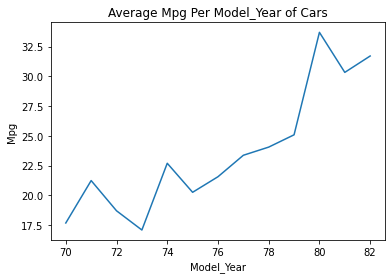

In [25]:
def YearlyMileage(df):
    mean_mpg_by_model_year = data[['Mpg','Model_Year']].groupby('Model_Year').mean()
    return mean_mpg_by_model_year

def plot_mpg(my_group):
    plt.title('Average Mpg Per Model_Year of Cars')
    plt.ylabel('Mpg')
    plt.xlabel('Model_Year')
    plt.plot(YearlyMileage(data))
    return 

YearlyMileage(data)
plot_mpg(group1)

## Exercise 7: Explore Additional aspects of the data using statistics 

Look at the statistics for the `float` variables in the data set.  
Report there mean, standard deviation, 5-number summary.  
Plot the distributions using histograms.  

Which distribution has the most skew? 

Look at the statistics and distribution again now grouped by country of origin.  

Look at the statistics and distribution again now grouped by number of cylinders.  

Car_Name
Chevy_S-10    18.0
Chevy_S-10    15.0
Chevy_S-10    18.0
Chevy_S-10    16.0
Chevy_S-10    17.0
              ... 
Chevy_S-10    27.0
Chevy_S-10    44.0
Chevy_S-10    32.0
Chevy_S-10    28.0
Chevy_S-10    31.0
Name: Mpg, Length: 398, dtype: float64


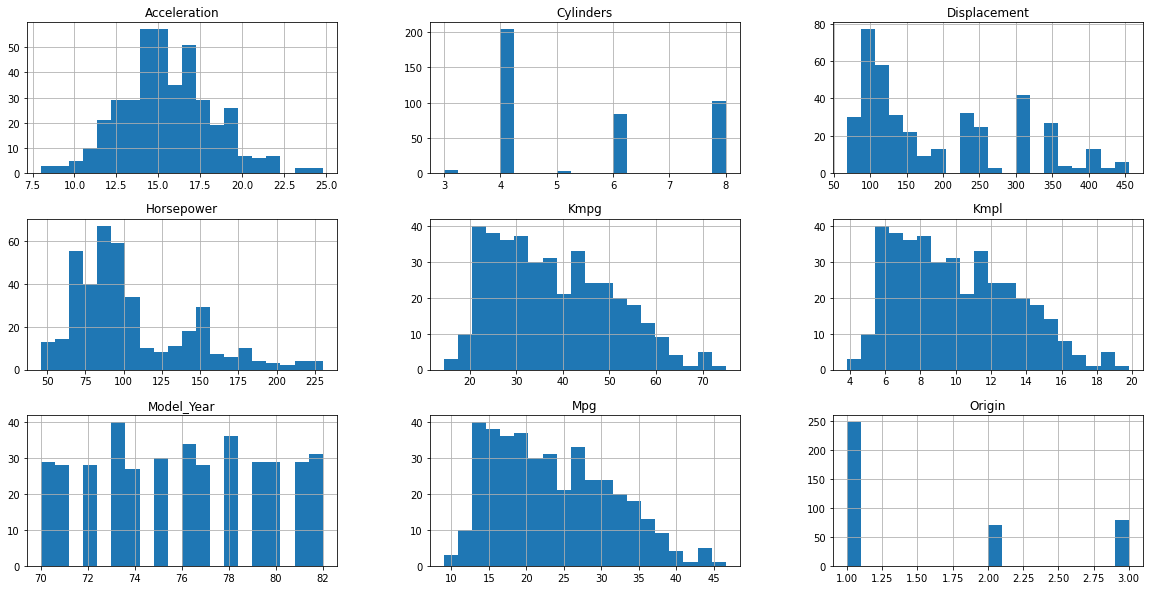

In [9]:
just_float64 = data.select_dtypes(np.number)
# Mean, Standard Deviation, and Five Number Summary of the data 
five_num = just_float64.describe()

print(just_float64['Mpg'])

# Function that takes in the data that is float64 and displays the 
# distributions via histogram
def plot_sum(data):
  select = [x for x in data.columns if x != 'Weight' ]
  data.loc[:, select].hist(bins=20,figsize=(20,10))
    
### RESPONSE: It appears that Horsepower is the most skewed out of all of the predictors.
### There are many that are skewed, like Mpg, Kmpg, and Kmpl, but it appears visually 
### that Horsepower is the most skewed

plot_sum(just_float64)

origin = just_float64.groupby('Origin')
cylinders = just_float64.groupby('Cylinders')

Histograms based on the cylinders group
2
              Mpg   Cylinders  Displacement  ...  Origin        Kmpl        Kmpg
count  249.000000  249.000000    249.000000  ...   249.0  249.000000  249.000000
mean    20.083534    6.248996    245.901606  ...     1.0    8.538394   32.314406
std      6.402892    1.661425     98.501839  ...     0.0    2.722151   10.302253
min      9.000000    4.000000     85.000000  ...     1.0    3.826296   14.481000
25%     15.000000    4.000000    151.000000  ...     1.0    6.377160   24.135000
50%     18.500000    6.000000    250.000000  ...     1.0    7.865164   29.766500
75%     24.000000    8.000000    318.000000  ...     1.0   10.203456   38.616000
max     39.000000    8.000000    455.000000  ...     1.0   16.580616   62.751000

[8 rows x 10 columns]
4
             Mpg  Cylinders  Displacement  ...  Origin       Kmpl       Kmpg
count  70.000000  70.000000     70.000000  ...    70.0  70.000000  70.000000
mean   27.891429   4.157143    109.142857  ...    

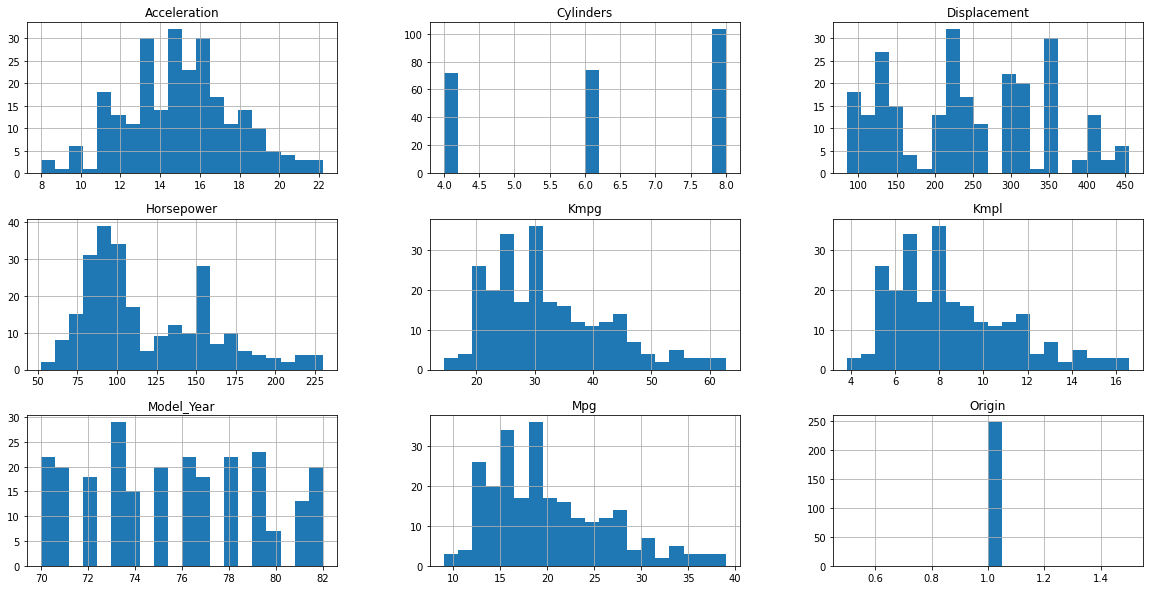

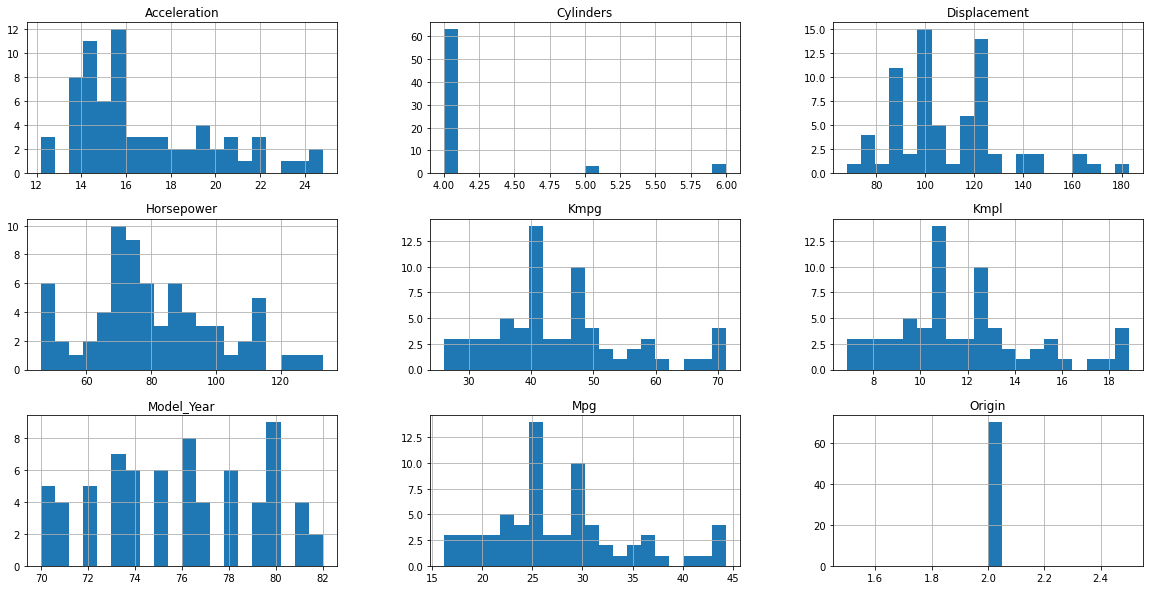

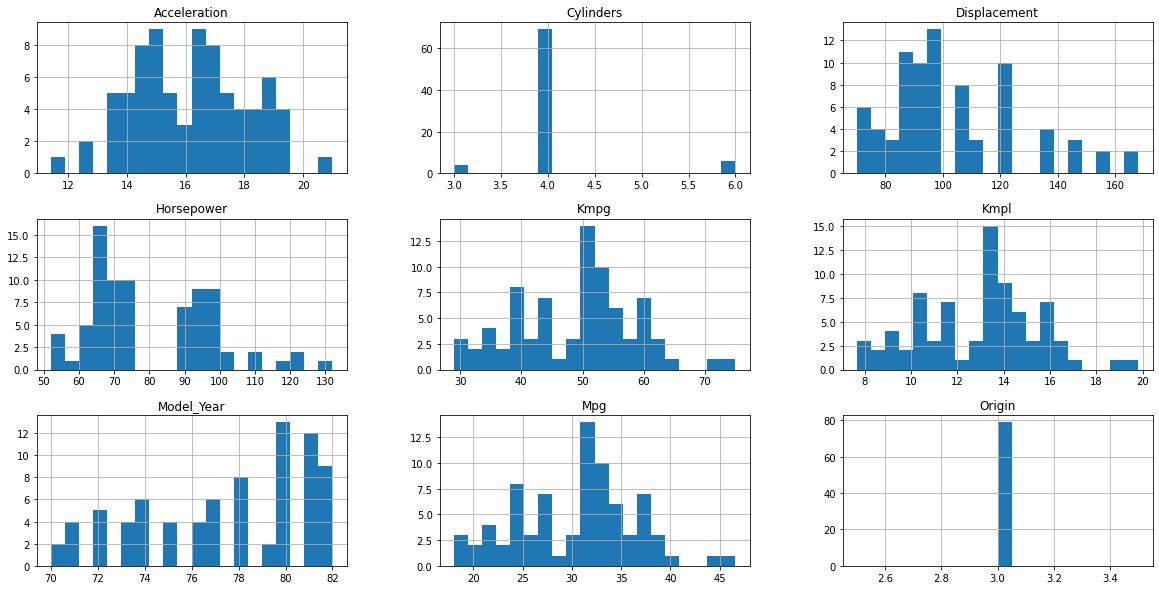

In [21]:
print('Histograms based on the origin group')
for x, group in origin:
  print(str(x))
  print(group.describe())
  plot_sum(group)

Histograms based on the cylinders group
6
             Mpg  Cylinders  Displacement  ...  Origin       Kmpl       Kmpg
count   4.000000        4.0           4.0  ...     4.0   4.000000   4.000000
mean   20.550000        3.0          72.5  ...     3.0   8.736709  33.064950
std     2.564501        0.0           5.0  ...     0.0   1.090282   4.126283
min    18.000000        3.0          70.0  ...     3.0   7.652592  28.962000
25%    18.750000        3.0          70.0  ...     3.0   7.971450  30.168750
50%    20.250000        3.0          70.0  ...     3.0   8.609166  32.582250
75%    22.050000        3.0          72.5  ...     3.0   9.374425  35.478450
max    23.700000        3.0          80.0  ...     3.0  10.075913  38.133300

[8 rows x 10 columns]
8
              Mpg  Cylinders  Displacement  ...      Origin        Kmpl        Kmpg
count  204.000000      204.0    204.000000  ...  204.000000  204.000000  204.000000
mean    29.286765        4.0    109.796569  ...    1.985294   12.451092 

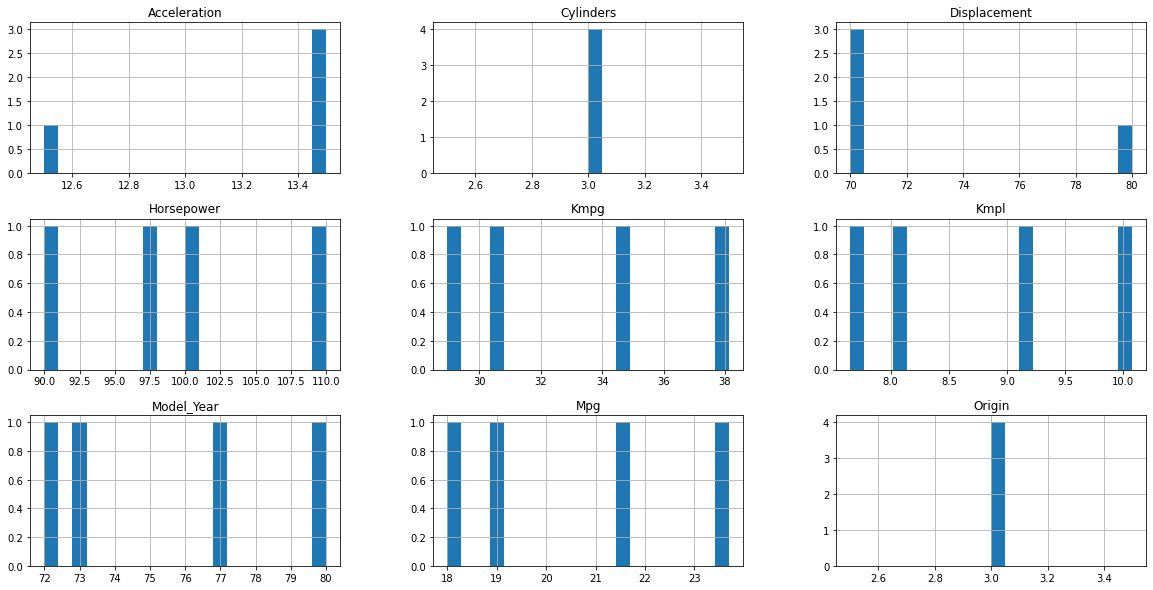

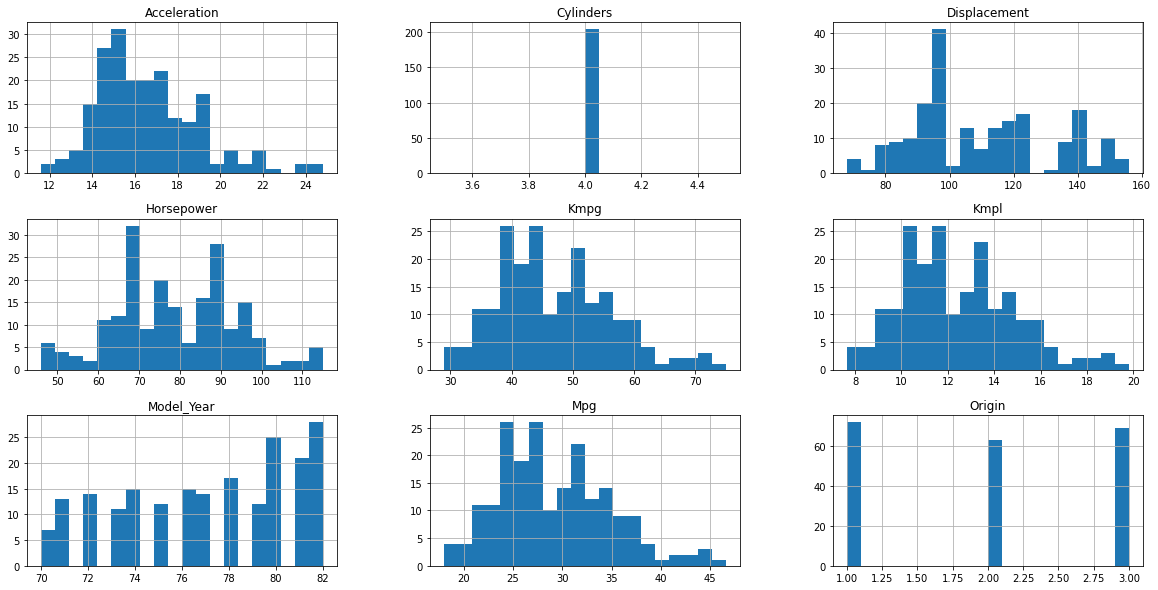

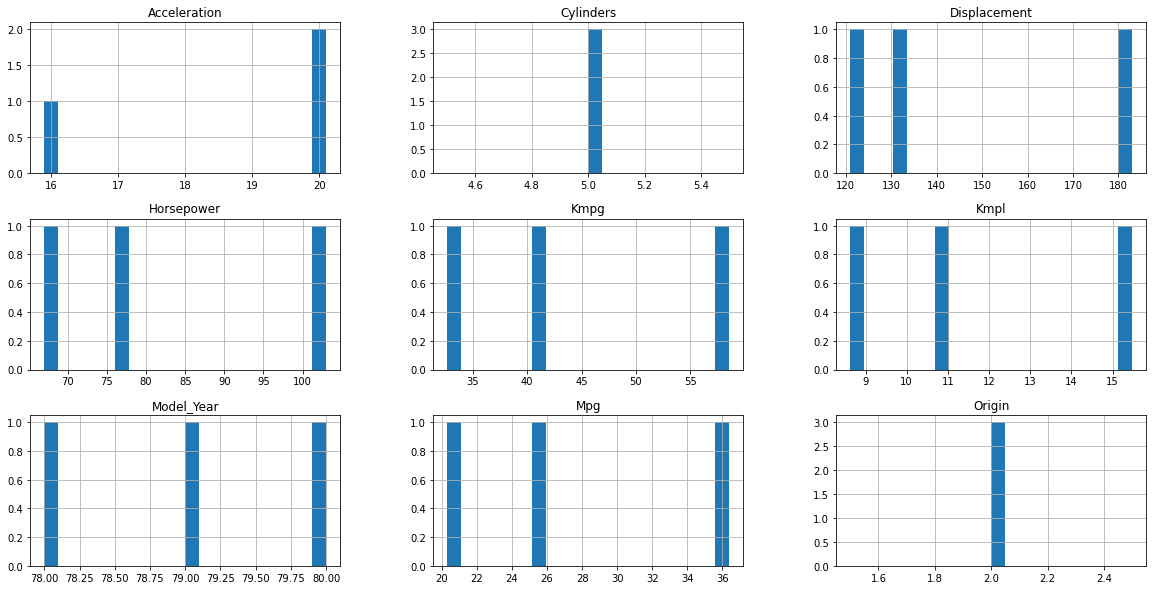

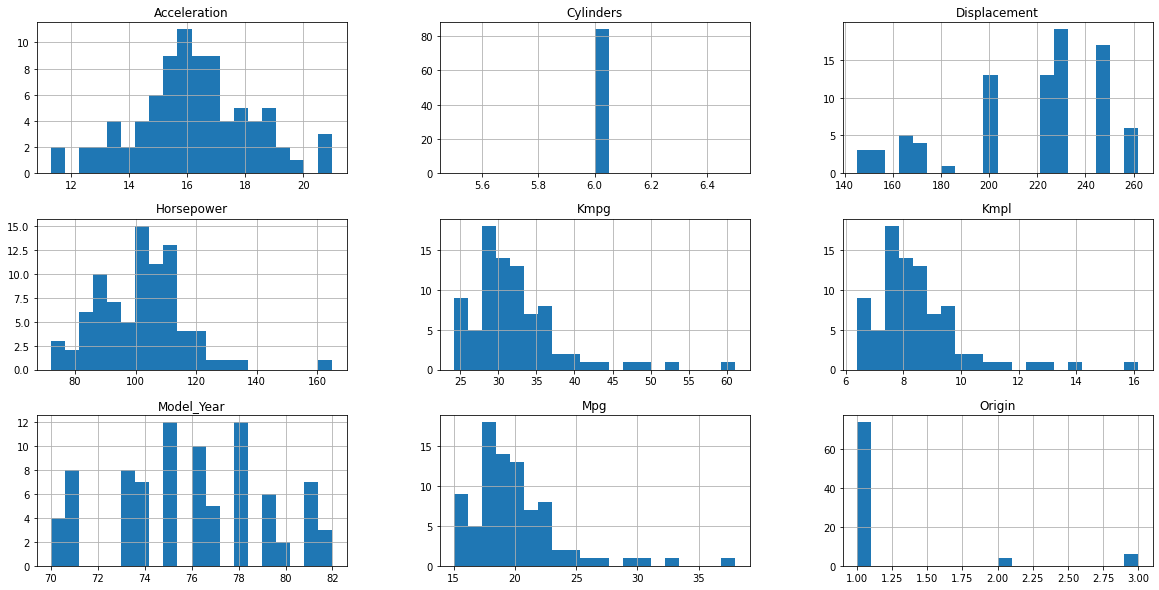

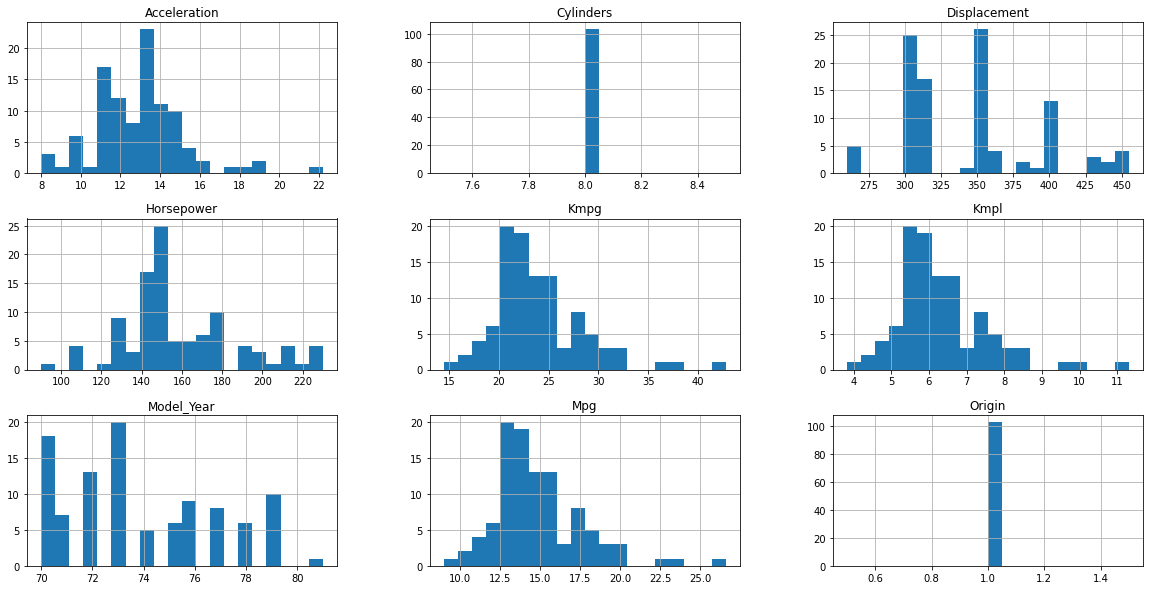

In [22]:
print('Histograms based on the cylinders group')
for x, group in cylinders:
  print(str(x*2))
  print(group.describe())
  plot_sum(group)